# Preprocess seurat PBMC cite-seq data

In [1]:
import cytovi
import readfcs
import scanpy as sc
import scvi
import anndata as ad
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data
adata = scvi.data.pbmc_seurat_v4_cite_seq(
    save_path='../data/raw/CITE_seq/Seurat_PBMC/'
)

adata_protein = ad.AnnData(adata.obsm['protein_counts'], obs = adata.obs)

INFO     File ../data/raw/CITE_seq/Seurat_PBMC/pbmc_seurat_v4.h5ad already downloaded                              


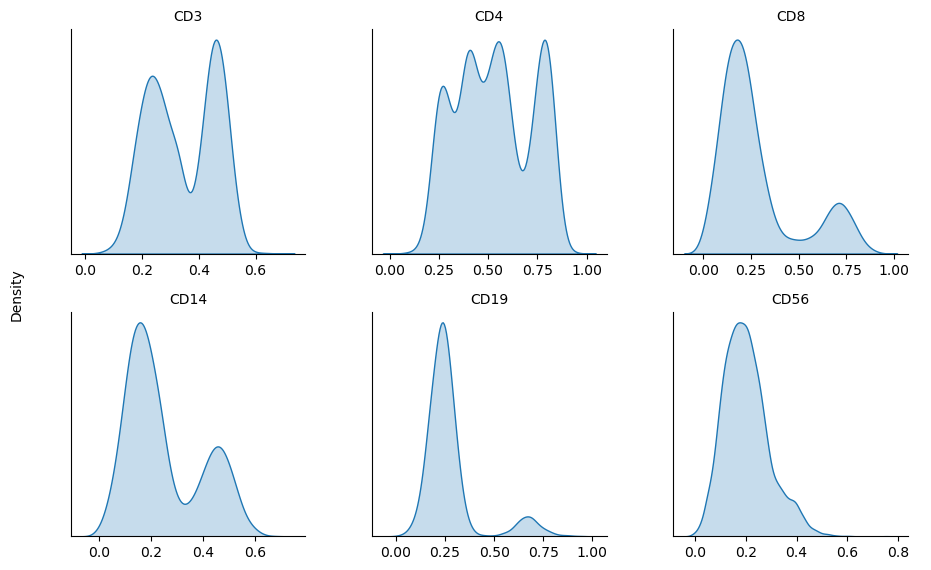

In [16]:
# preprocessing
adata_protein.layers['raw'] = adata_protein.X
cytovi.pp.arcsinh(adata_protein)
cytovi.pp.scale(adata_protein)

# plot histograms
cytovi.pl.histogram(adata_protein, marker=['CD3', 'CD4', 'CD8', 'CD14', 'CD19', 'CD56'], layer_key = 'scaled')

In [87]:
# save preprocessed cite-seq data
del adata_protein.uns['scaler_params']
adata_protein.write('../data/raw/CITE_seq/Seurat_PBMC/2024-02-16_cite_seq_processed.h5ad')